# **ENTREGA 1. PROYECTO IA 2024.2**

In [1]:
!pip install kaggle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [3]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [4]:
data = {"username":"angeldavidmuoztorres","key":"da4e93b7ad051f3006a6718b697bf8d5"}
with open('kaggle.json','w') as file:
  json.dump(data, file, indent=4)

In [5]:
!kaggle competitions download -c udea-ai4eng-20242

 25% 5.00M/20.1M [00:00<00:00, 51.8MB/s]
100% 20.1M/20.1M [00:00<00:00, 114MB/s] 


In [6]:
!unzip \*.zip && rm *.zip

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [7]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


In [8]:
z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


## **COLUMNAS DE LA BASE DE DATOS**

In [9]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


# **1. ESTUDIANTES POR DEPARTAMENTO**

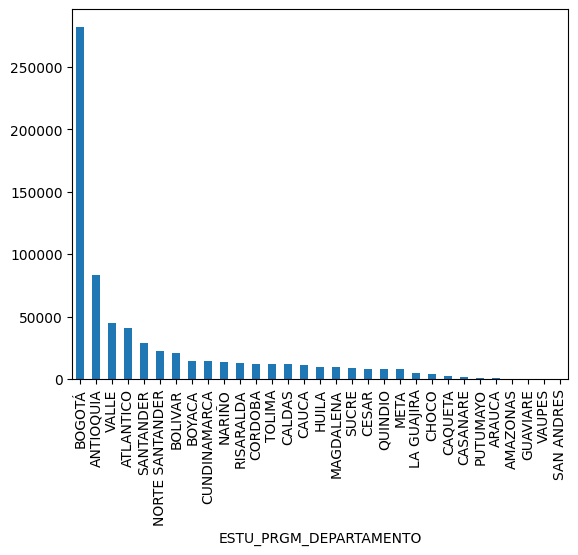

In [10]:
z.ESTU_PRGM_DEPARTAMENTO.value_counts().plot(kind='bar')
plt.show()

# **2. CANTIDAD DE ESTUDIANTES POR DEPARTAMENTO**

In [11]:
estudiantesdepar = z['ESTU_PRGM_DEPARTAMENTO'].value_counts()
display(estudiantesdepar)

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


# **3. RENDIMIENTO ESTUDIANTES SOLO BOGOTA**


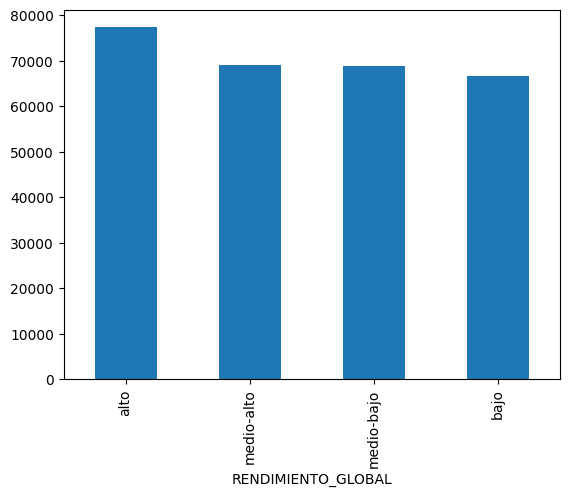

In [12]:
bogota = z[z["ESTU_PRGM_DEPARTAMENTO"] == "BOGOTÁ"]
bogota.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')
plt.show()

# **4. ESTUDIANTES POR ESTRATO EN EL PAIS**

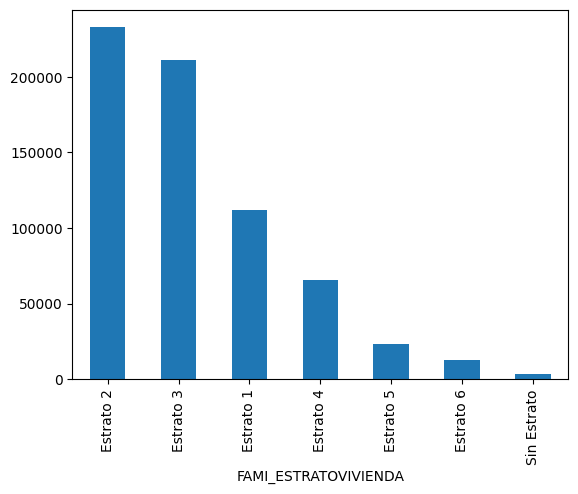

In [13]:
z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')
plt.show()

# **5. RENDIMIENTO POR ESTRATO EN EL PAIS**




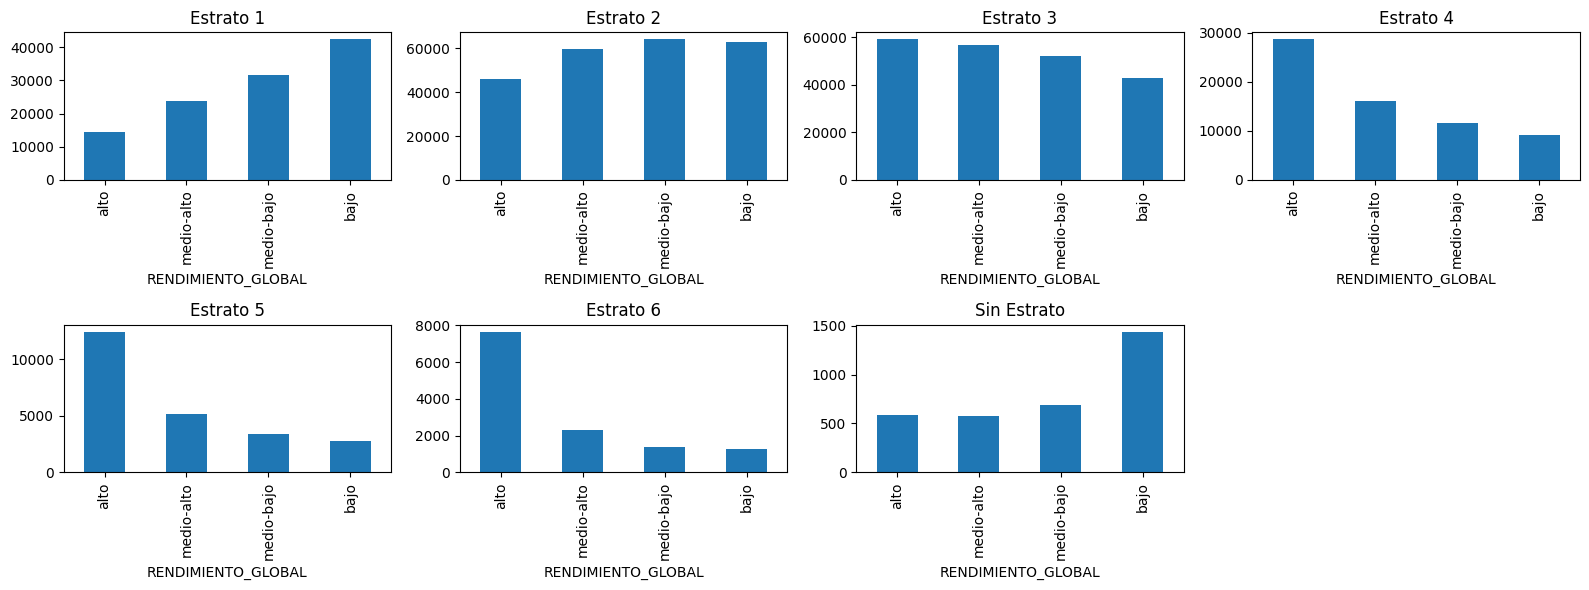

In [14]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['alto', 'medio-alto', 'medio-bajo', 'bajo']].plot(kind='bar')
    plt.title(ci)

# **6. ESTUDIANTES POR HORAS TRABAJADAS**

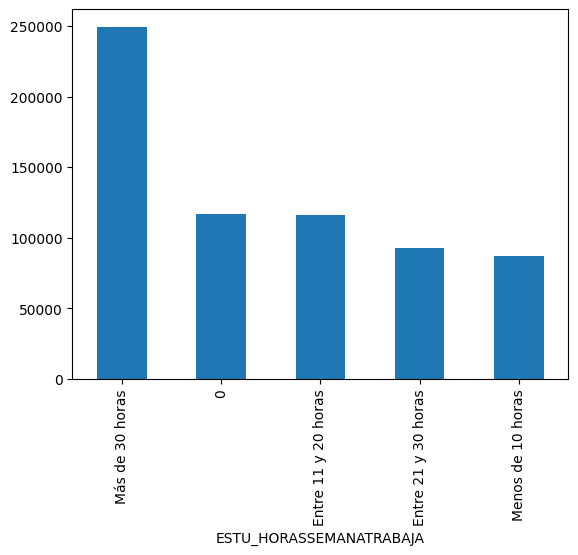

In [15]:
z.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')
plt.show()

# **7. RENDIMIENTO POR HORAS TRABAJADAS EN EL PAIS**


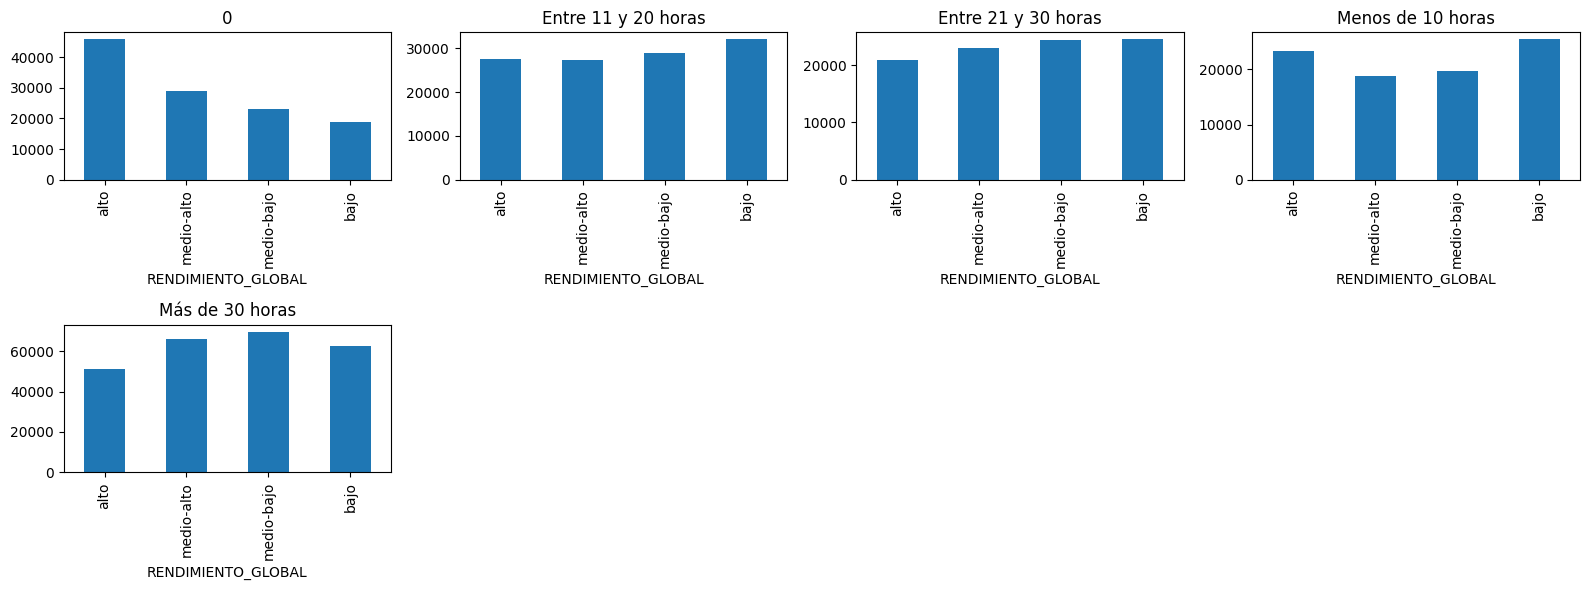

In [16]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['alto', 'medio-alto', 'medio-bajo', 'bajo']].plot(kind='bar')
    plt.title(ci)

# **8. CANTIDAD DE ESTUDIANTES POR PREGRADO**

In [17]:
estudiantesprog = z['ESTU_PRGM_ACADEMICO'].value_counts()
display(estudiantesprog)

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1
